# BAN6800 Module 4: Business Analytics Model

## Customer Segmentation using K-Means Clustering

### Introduction

In today's highly competitive market, understanding customer behavior is crucial for Amazon to tailor its marketing strategies effectively. Customer segmentation, the process of dividing a customer base into distinct groups based on similar characteristics, allows Amazon to target each group with personalized marketing strategies. In this project, we aim to perform customer segmentation using the K-Means clustering algorithm, a popular unsupervised machine learning technique.

### Problem Identification

Our primary goal is to segment customers based on their purchasing behavior to identify distinct customer groups. This will enable the business to understand different customer types, improve marketing strategies, and enhance customer satisfaction.

### Factors influencing the choice of model:


* Problem Type: Understanding customer needs.
* Data Availability and Quality: We have a dataset of customer transactions with features like purchase frequency, recency, and monetary value suitable for clustering algorithm.
* Model Complexity: We aim to keep the model simple yet effective, balancing the need for accuracy with interpretability.
* Balancing Accuracy and Interpretability: K-Means is chosen for its simplicity, ease of interpretation, and effectiveness in clustering tasks.

## Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Cleaned Dataset

In [2]:
# Import cleaned and processed dataset for model building and evaluation
# Load the dataset
file_path = 'Finalized_Amazon_Customer_Behavior.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Dataset:")
data.head()

Initial Dataset:


Purchase_Frequency  Purchase_Categories  \
0                   0                    0   
1                   3                    8   
2                   0                   20   
3                   3                    4   
4                   1                    1   

   Personalized_Recommendation_Frequency  Cart_Completion_Frequency  \
0                                      2                          4   
1                                      2                          2   
2                                      0                          4   
3                                      1                          4   
4                                      2                          4   

   Cart_Abandonment_Factors  Saveforlater_Frequency  \
0                         1                       4   
1                         2                       3   
2                         1                       3   
3                         1                       4   
4                         2                       3   

   Personalized_Recommendation_Frequency   Rating_Accuracy   \
0                               -0.676310         -1.862475   
1                               -0.676310          0.368012   
2                                1.250931          0.368012   
3                                0.287311          0.368012   
4                                1.250931         -0.747232   

   Shopping_Satisfaction  Satisfaction_Score  
0              -1.443019           -1.316625  
1              -0.457341           -0.228249  
2               0.528336            0.424777  
3               1.514014            1.077802  
4              -0.457341           -0.663599

In [3]:
# Dimensionality Reduction
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
data_pca = pca.fit_transform(data)


### Model Building: K-Means Clustering
#### Choosing the Elbow Method
* Determining the optimal number of clusters (K) is critical. We will use the Elbow Method to identify the best K value.

In [4]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

## Plotting the Elbow Method Graph

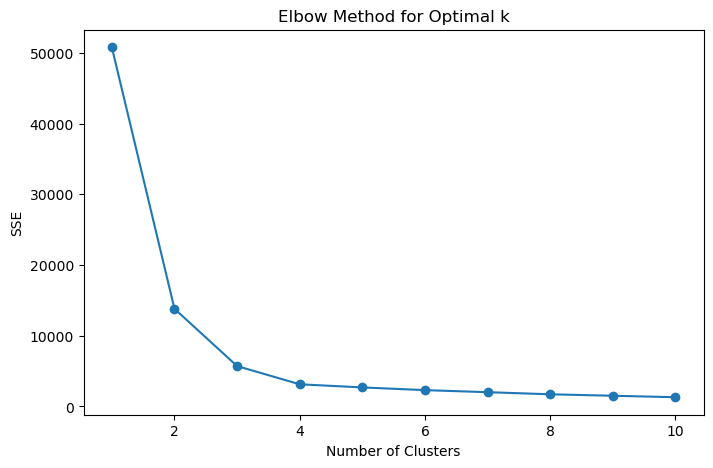

In [5]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

Based on the Elbow Method graph, the optimal number of clusters (K) is 3. This is where the "elbow" or significant change in the slope occurs, indicating diminishing returns in reducing the Sum of Squared Errors (SSE) beyond this point. 

In [6]:
# Based on the elbow method, select the optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_pca)

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Evaluate Clusters

In [7]:
# Calculate the silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(data_pca, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6077263605646838


* The calculated silhouette score of 0.607 indicates that the clustering technique used in the analysis of distinct Amazon customer behavior data has produced a well-defined segmentation.
* This score, which ranges from -1 to 1, reflects how similar customers within the same cluster are to each other compared to customers in other clusters.
* A score above 0.6 is considered good, suggesting that the clustering effectively captures distinct patterns in customer behavior.
* This result demonstrates that the K-means clustering method has successfully identified meaningful groups within the data, enabling a deeper understanding of customer needs and preferences based on their purchasing patterns.

### Generate a pair plot to visualize clusters

C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Adeitan Richard\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


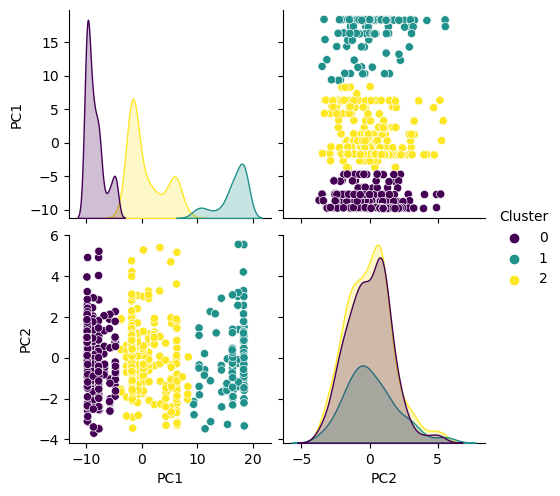

In [8]:
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['Cluster'] = data['Cluster']
sns.pairplot(data_pca_df, hue='Cluster', palette='viridis')
plt.show()

### Cluster Interpretation and Labeling

In [9]:
# Analyze the cluster centroids to understand the customer segments
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])
centroids['Cluster'] = range(optimal_k)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
          PC1       PC2  Cluster
0  -8.384707 -0.035019        0
1  16.259370  0.117468        1
2   0.771971 -0.017684        2


In [10]:

# Define meaningful labels for the clusters based on the centroids
cluster_labels = {
    0: 'Low Satisfaction, Infrequent Buyers',
    1: 'High Satisfaction, Frequent Buyers',
    2: 'Moderate Satisfaction, Average Buyers'
}

# Map the cluster numbers to labels
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

# Display the final dataset with clusters and their labels
print(data[['Cluster', 'Cluster_Label']].head())

   Cluster                          Cluster_Label
0        0    Low Satisfaction, Infrequent Buyers
1        2  Moderate Satisfaction, Average Buyers
2        1     High Satisfaction, Frequent Buyers
3        0    Low Satisfaction, Infrequent Buyers
4        0    Low Satisfaction, Infrequent Buyers


## Conclusion

The clustering analysis of Amazon customer behavior has successfully segmented the customers into three distinct groups, each reflecting different levels of satisfaction and buying frequency:

1. Low Satisfaction, Infrequent Buyers (Cluster 0): This group constitutes customers who are generally dissatisfied and infrequent in their purchases. These customers might be disengaged or have had negative experiences, making them less likely to be repeat buyers. To improve engagement, Amazon could consider targeted marketing strategies, personalized offers, or addressing potential pain points in their shopping experience.

2. Moderate Satisfaction, Average Buyers (Cluster 2): Customers in this segment exhibit moderate satisfaction with their shopping experiences and have an average frequency of purchases. This group represents a middle ground and may be more susceptible to influence. By enhancing their shopping experience or offering incentives, Amazon could potentially convert these customers into more loyal, frequent buyers.

3. High Satisfaction, Frequent Buyers (Cluster 1): This segment includes highly satisfied customers who frequently make purchases. These customers are likely loyal and engaged, contributing significantly to Amazon's revenue. Maintaining their satisfaction through continued excellent service, exclusive offers, and rewards could help retain this valuable customer base.

Overall, the clustering results provide valuable insights into customer segments, enabling Amazon to tailor its strategies to meet the specific needs of each group. This segmentation can guide targeted marketing efforts, improve customer satisfaction, and ultimately enhance customer loyalty and business growth.

## Github Dataset Link
